In [ ]:
I adapted the code from here
https://github.com/jwass/mplleaflet/blob/master/examples/contour.py

In [18]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt
import geopandas as gpd

import mplleaflet

plt.rcParams["figure.figsize"] =(10,8)

In [13]:
# Download a file from: http://water.weather.gov/precip/download.php
# and change the path below
filename= r"D:\Users\jconning\Documents\IPython notebooks\geopandas\GeoPanLearn\rain\nws_precip_last7days_observed_20150706.shp"
df = gpd.read_file(filename)

In [14]:
df.columns

Index(['Globvalue', 'Hrapx', 'Hrapy', 'Id', 'Lat', 'Lon', 'Units', 'geometry'], dtype='object')

In [15]:
# Negative values are missing data so just drop them
df = df[df['Globvalue'] > 0]

# Setting the index, then calling unstack() creates the matrix of values 
# indexed by Hrapx in the columns, Hrapy in the rows. Try to do that in
# MATLAB!
df.set_index(['Hrapy', 'Hrapx'], inplace=True)
df = df.unstack()

In [16]:
# Sorting the values here is unnecessary, but do it just in case
df.sort_index(axis=0, inplace=True)
df.sort_index(axis=1, inplace=True)

In [31]:
crs = {'lon_0': -105.0,
       'lat_ts': 60.0,
       'R': 6371200,
       'proj': 'stere',
       'units': 'm',
       'lat_0': 90.0}

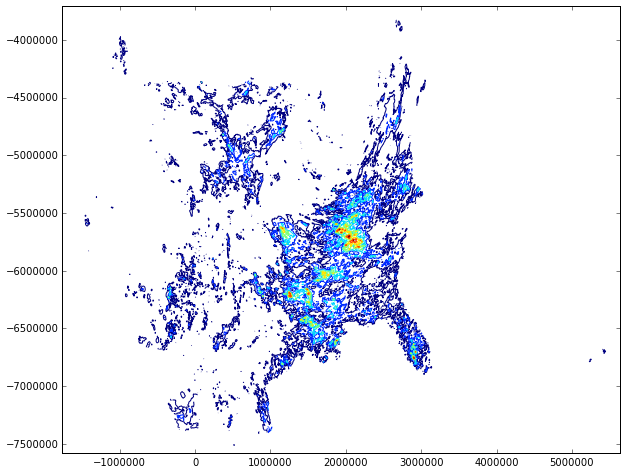

In [35]:
g = df['Globvalue']
plt.contour(4762.5 * (g.columns.values - 401), 
            4762.5 * (g.index.values - 1601), g)

# See http://www.nws.noaa.gov/oh/hrl/distmodel/hrap.htm
# Note: The Proj.4 CRS definition below is gleaned from reading the NWS and
# Proj.4 docs. Reach out if it's not correct although the resulting map looks
# right.


In [34]:
#MPLleaflet show doesn't seem to be working right...
mplleaflet.show(crs=crs)